## Final Project Submission

Please fill out:
* Student name: **Chelsea Power**
* Student pace: **part time**
* Scheduled project review date/time: **March 7, 2019 at 11 am ET**
* Instructor name: **Joe San Pietro**
* Blog post URL: **TBD**


## Phase 1: Understanding the Dataset

* Import the housing sale prices in King County, USA between the time period May 2014 - May 2015. 

In [1]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('kc_house_data.csv')

#Look at size of the dataset
df.shape

(21597, 21)

In [2]:
#Show first ten rows in DataFrame
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


### Variable definitions

* id - Unique ID for each home sold 
* date - Date of the home sale 
* price - Price of each home sold 
* bedrooms - Number of bedrooms 
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 
* sqft_living - Square footage of the apartments interior living space 
* sqft_lot - Square footage of the land space 
* floors - Number of floors 
* waterfront - For whether the apartment was overlooking the waterfront or not 1’s represent a waterfront property, 0’s represent a non-waterfront property 
* view - An index from 0 to 4 of how good the view of the property was, 0 - lowest, 4 - highest 
* condition - An index from 1 to 5 on the condition of the apartment, 1 - lowest, 4 - highest 
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of * construction and design, and 11-13 have a high quality level of construction and design. 
* sqft_above - The square footage of the interior housing space that is above ground level 
* sqft_basement - The square footage of the interior housing space that is below ground level 
* yr_built - The year the house was initially built 
* yr_renovated - The year of the house’s last renovation 
* zipcode - What zipcode area the house is in 
* lat - Lattitude 
* long - Longitude 
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Phase 2: Scrubbing (Data Preparation)

* Detecting and deal with missing values
* Data type conversions (e.g. numeric data mistakenly encoded as objects/strings)
* Checking for and removing multicollinearity (correlated predictors)

In [3]:
# Checking the column types and entries per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# Show total missing values by column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

* Replace null values for `waterfront`, `view` and `yr_renovated`

In [5]:
# Show unique values for waterfront column
df['waterfront'].unique()

array([nan,  0.,  1.])

In [3]:
# Replace null values with 0 rather than removing 2376 rows
# Waterfront is a category variable where 0 = no view and 1 = view
df['waterfront'].fillna(0, inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# Show unique values for view column
df["view"].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [4]:
# Replace 63 null values with 0 to be equilivant to no view to onvert variable from a float to an int
# View is a categorical value
df['view'].fillna(0, inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
# Show unique values for yr_renovated column
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [5]:
# Replace null values with 0 so I can convert yr_renovated from a float to an int
df['yr_renovated'].fillna(0, inplace=True)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Change types of the variables 

* Change objects to appropiate formats
* Make categorical variables

In [6]:
# Convert from object to datetime
df['date'] = df['date'].astype('datetime64[ns]')

# Convert from object to int64
df['yr_renovated'] = df['yr_renovated'].astype('int64')

# Make categorical variables
df["waterfront"] = df["waterfront"].astype('category')
df["condition"] = df["condition"].astype('category')
df["view"] = df["view"].astype('category')
df["grade"] = df["grade"].astype('category')

# Convert sqft_basement from object to float
df['sqft_basement'] = pd.to_numeric(df["sqft_basement"], errors = 'coerce').fillna(0, downcast='infer')

## Summary

* All columns have missing values removed and have been set to the correct type
* Will not be considering the means and std values for categorical (`waterfront`, `view`, `condition` and `grade`) and datetime (`date`) variables
* Will not be considering the means and std values for `id`, `zipcode`, `lat`, `long` columns
* Create heatmap to identify most important features and explore the intercorrelation between features

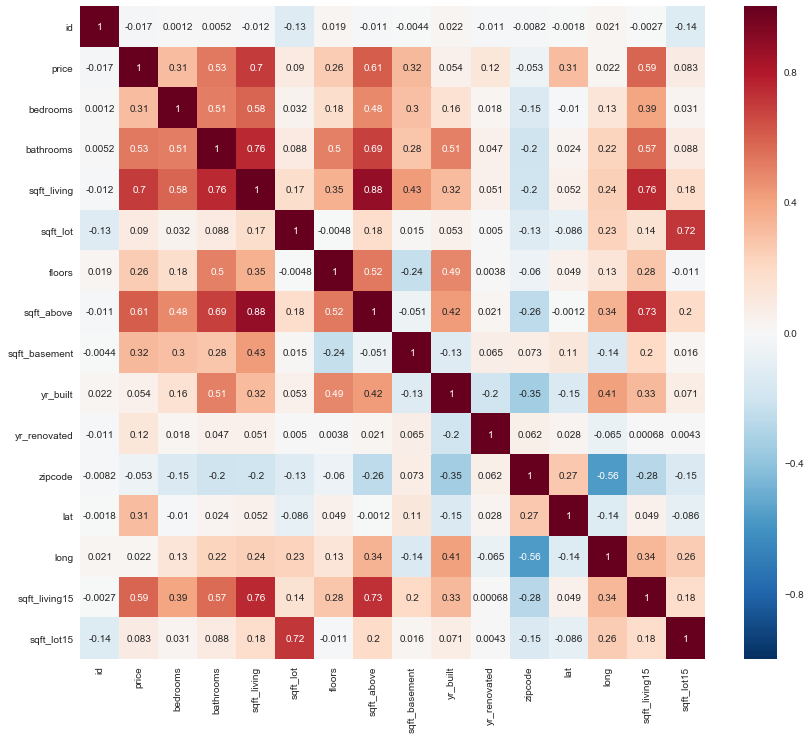

In [7]:
#Create coorelation heatmap
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

## Heatmap Summary

* Multicolinarity is high for: `bathrooms`, `sqft_living`, `sqft_above`, and `sqft_living15`. These are good candidates to be removed.
* Create new dataframe `df_pred` and drop `ID`.

In [8]:
# Remove ID
df_pred = df.drop(['id'], axis=1)

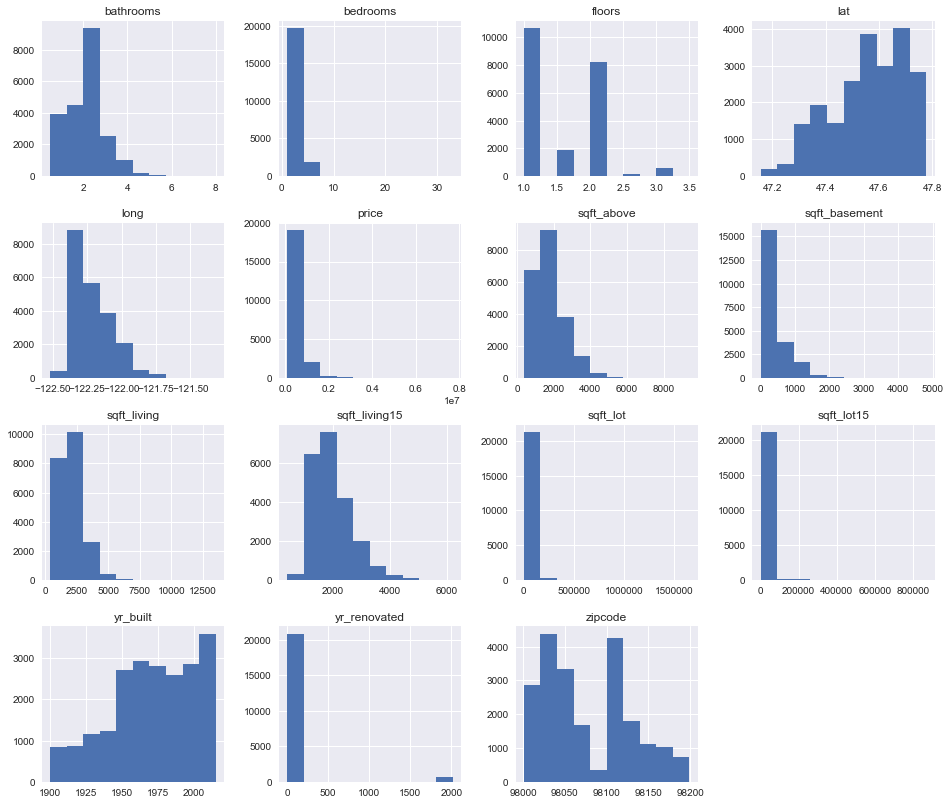

In [9]:
# Look at histograms for all columns
df_pred.hist(figsize = [16, 14]);

### Summary

* There are some obvious outliers in `bedrooms`, `bathrooms`, `sqft_basement`, `sqft_lot`, and `sqft_lot15` columns 
* Drop rows `bedrooms` to only include bedrooms 5 or less
* Drop rows `bathrooms` to only include bedrooms between 0 and 4
* Drop rows `sqft_above` to only include less than 4,000
* Drop rows `sqft_living` to only include less than 4,000
* Drop rows `sqft_living15` to only include less than 4,000
* Drop rows `sqft_lot` to only include less than 30,000
* Drop rows `sqft_lot15` to only include less than 20,000
* After dropping rows, show histogram again

In [10]:
# Filter bedrooms 5 or less
df_pred.drop(df_pred[ df_pred['bedrooms'] > 5 ].index, inplace=True)

# Filter bathrooms 0 to 4
df_pred.drop(df_pred[ (df_pred['bathrooms'] <= 0) & (df_pred['bathrooms'] >= 4) ].index, inplace=True)

# Filter sqft_above size 4,000 or less
df_pred.drop(df_pred[ df_pred['sqft_above'] > 4000 ].index, inplace=True)

# Filter sqft_basement size l,000 or less
df_pred.drop(df_pred[ df_pred['sqft_basement'] > 1000 ].index, inplace=True)

# Filter sqft_living size 4,000 or less
df_pred.drop(df_pred[ df_pred['sqft_living'] > 4000 ].index, inplace=True)

# Filter sqft_living15 size 4,000 or less
df_pred.drop(df_pred[ df_pred['sqft_living15'] > 4000 ].index, inplace=True)

# Filter sqft_lot size 30,000 or less
df_pred.drop(df_pred[ df_pred['sqft_lot'] > 30000 ].index, inplace=True)

# Filter sqft_lot15 size 20,000 or less
df_pred.drop(df_pred[ df_pred['sqft_lot15'] > 20000 ].index, inplace=True)

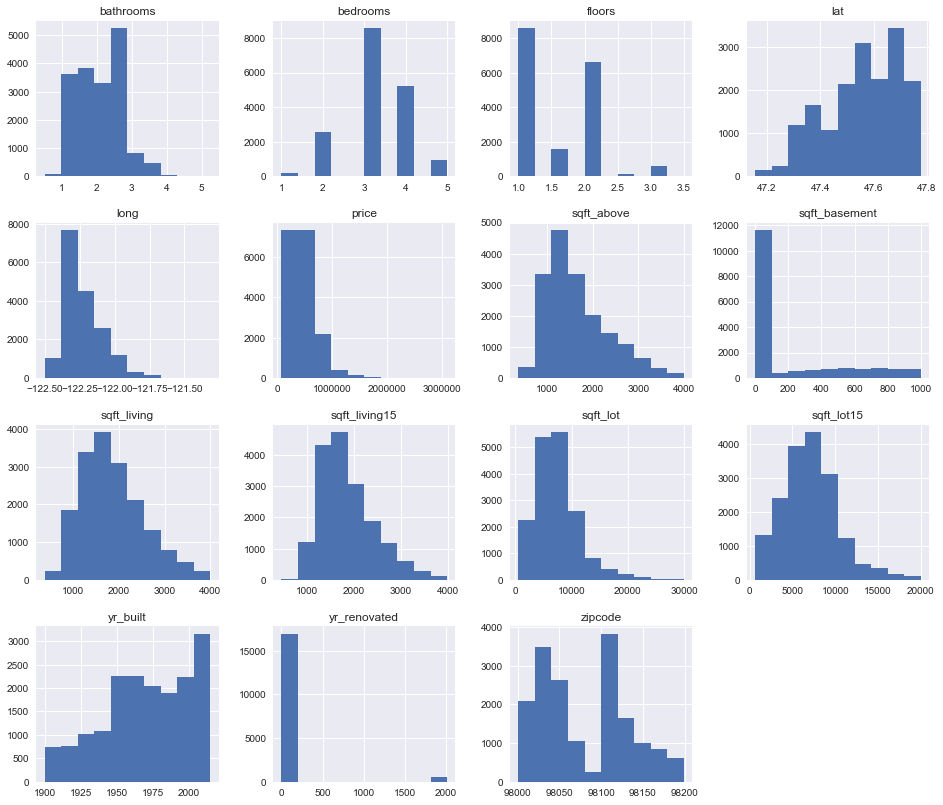

In [16]:
# Show histogram again with dropped outliners
df_pred.hist(figsize = [16, 14]);

## Phase 3: Exploring

* Log transform variables in new DataFrame `df_log`
* Cannot log transform `sqft_basement` since there are 303 rows of 0's in this column
* Cannot log transform `yr_renovated` since there are 70 rows of 0's in this column
* Both of these variables are candiadates to dropped and/or become category variables

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


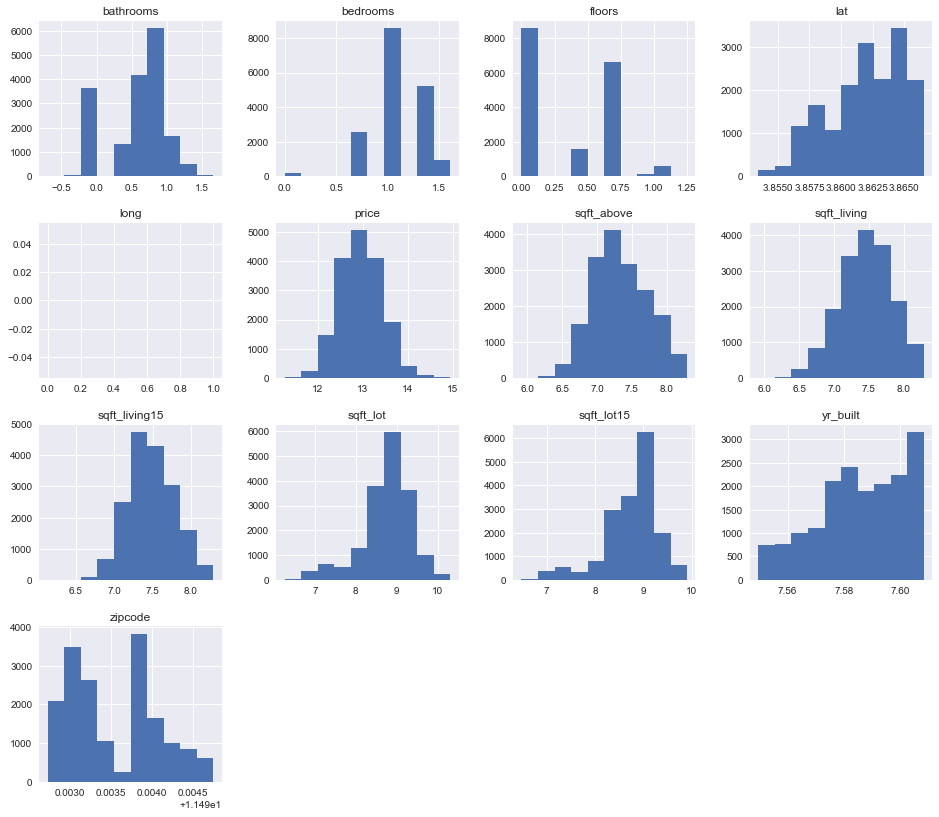

In [11]:
# Log transform variables

df_log = pd.DataFrame([])
df_log["bedrooms"] = np.log(df_pred["bedrooms"])
df_log["bathrooms"] = np.log(df_pred["bathrooms"])
df_log["floors"] = np.log(df_pred["floors"])
df_log["lat"] = np.log(df_pred["lat"])
df_log["long"] = np.log(df_pred["long"])
df_log["price"] = np.log(df_pred["price"])
df_log["sqft_above"] = np.log(df_pred["sqft_above"])
# sqft_basement variable is not log transformed because it has 0's in it
# consider making sqft_basement a category
df_log["sqft_living"] = np.log(df_pred["sqft_living"])
df_log["sqft_living15"] = np.log(df_pred["sqft_living15"])
df_log["sqft_lot"] = np.log(df_pred["sqft_lot"])
df_log["sqft_lot15"] = np.log(df_pred["sqft_lot15"])
df_log["yr_built"] = np.log(df_pred["yr_built"])
# yr_renovated variable is not log transformed because it has 0's in it
# consider making a new category with yr_renovated
df_log["zipcode"] = np.log(df_pred["zipcode"])
df_log.hist(figsize  = [16, 14]);

* Based on the log transformed histograms above, `long` will be dropped from this DataFrame
* `ID` and `Date` will also be dropped from the `df_log` DataFrame

In [12]:
# Remove ID
df_log = df.drop(['long','id','date'], axis=1)
df_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0,98178,47.5112,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991,98125,47.7210,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0,98028,47.7379,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0,98136,47.5208,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0,98074,47.6168,1800,7503


## Phase 4: Modeling

* Create OLS Model get R-squared & P-values
* Compare continuous features to categorical
* Conduct recrussive feature elimination
* Train/Test Split
* 10-fold cross validation

In [13]:
# Ordinary Least Squares
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Runs OLS regression between (continuous) independent and dependent variables
col_names = df_log.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("")
    print ("King County Houses: Price~" + val)
    print ("------------------------------")
    f = 'price~' + val
    model = smf.ols(formula=f, data=df_log).fit()
    X_new = pd.DataFrame({val: [df_log[val].min(), df_log[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


King County Houses: Price~bedrooms
------------------------------
['bedrooms', 0.0953497028373066, 127199.51268533265, 122464.44417420312, 0.0]

King County Houses: Price~bathrooms
------------------------------
['bathrooms', 0.27657672267607736, 8712.651752670936, 251241.7624951595, 0.0]

King County Houses: Price~sqft_living
------------------------------
['sqft_living', 0.4926878990403508, -43988.89219422744, 280.8630143588747, 0.0]

King County Houses: Price~sqft_lot
------------------------------
['sqft_lot', 0.008077735099594086, 528258.0465134738, 0.7972846608151651, 5.571622021765821e-40]

King County Houses: Price~floors
------------------------------
['floors', 0.06594805661983039, 279114.9959148354, 174809.05327963608, 0.0]

King County Houses: Price~sqft_above
------------------------------
['sqft_above', 0.36647034726583827, 59757.11100593556, 268.66840596728946, 0.0]

King County Houses: Price~sqft_basement
------------------------------
['sqft_basement', 0.1031100713568

In [14]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0953497,127200,122464,0
2,bathrooms,0.276577,8712.65,251242,0
3,sqft_living,0.492688,-43988.9,280.863,0
4,sqft_lot,0.00807774,528258,0.797285,5.57162e-40
5,floors,0.0659481,279115,174809,0
6,sqft_above,0.36647,59757.1,268.668,0
7,sqft_basement,0.10311,463664,268.211,0
8,yr_built,0.00291096,-789622,674.743,2.11758e-15
9,yr_renovated,0.0138899,532119,118.934,1.17975e-67


### Results

* `bathrooms`, `sqft_living` , `sqft_above`, `sqft_basement` and `sqft_living15` should be removed based on R-squared values.
* NOTE: `bathrooms`, `sqft_living`, `sqft_above`  and `sqft_living15` also showed multicolinarity in the heatmap above
* After removing these variables, run OLS again

In [15]:
df_log2 = df_log.drop(['bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15'], axis=1)
df_log2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
price           21597 non-null float64
bedrooms        21597 non-null int64
sqft_lot        21597 non-null int64
floors          21597 non-null float64
waterfront      21597 non-null category
view            21597 non-null category
condition       21597 non-null category
grade           21597 non-null category
yr_built        21597 non-null int64
yr_renovated    21597 non-null int64
zipcode         21597 non-null int64
lat             21597 non-null float64
sqft_lot15      21597 non-null int64
dtypes: category(4), float64(3), int64(6)
memory usage: 1.6 MB


In [16]:
# Run OLS a second time
col_names = df_log2.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("")
    print ("King County Houses: Price~" + val)
    print ("------------------------------")
    f = 'price~' + val
    model = smf.ols(formula=f, data=df_log2).fit()
    X_new = pd.DataFrame({val: [df_log2[val].min(), df_log2[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


King County Houses: Price~bedrooms
------------------------------
['bedrooms', 0.0953497028373066, 127199.51268533265, 122464.44417420312, 0.0]

King County Houses: Price~sqft_lot
------------------------------
['sqft_lot', 0.008077735099594086, 528258.0465134738, 0.7972846608151651, 5.571622021765821e-40]

King County Houses: Price~floors
------------------------------
['floors', 0.06594805661983039, 279114.9959148354, 174809.05327963608, 0.0]

King County Houses: Price~yr_built
------------------------------
['yr_built', 0.002910962192005928, -789621.8059390201, 674.7430736386157, 2.1175812952275155e-15]

King County Houses: Price~yr_renovated
------------------------------
['yr_renovated', 0.013889854717611838, 532118.9189094184, 118.93350530972658, 1.1797519776657836e-67]

King County Houses: Price~zipcode
------------------------------
['zipcode', 0.0028518199974679748, 36496518.027921796, -366.6086085400776, 4.057896341239098e-15]

King County Houses: Price~lat
-----------------

In [17]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0953497,127200,122464,0
2,sqft_lot,0.00807774,528258,0.797285,5.57162e-40
3,floors,0.0659481,279115,174809,0
4,yr_built,0.00291096,-789622,674.743,2.11758e-15
5,yr_renovated,0.0138899,532119,118.934,1.17975e-67
6,zipcode,0.00285182,3.64965e+07,-366.609,4.0579e-15
7,lat,0.0940602,-3.81351e+07,813191,0
8,sqft_lot15,0.00686328,526060,1.11586,3.30159e-34


### Results

* Remove `sqft_lot`, `yr_built`, `zipcode`, and `sqft_lot15` and run model again

In [18]:
df_log3 = df_log2.drop(['sqft_lot', 'yr_built', 'zipcode', 'sqft_lot15'], axis=1)
df_log3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
price           21597 non-null float64
bedrooms        21597 non-null int64
floors          21597 non-null float64
waterfront      21597 non-null category
view            21597 non-null category
condition       21597 non-null category
grade           21597 non-null category
yr_renovated    21597 non-null int64
lat             21597 non-null float64
dtypes: category(4), float64(3), int64(2)
memory usage: 929.0 KB


In [19]:
# Run OLS a third time
col_names = df_log3.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("")
    print ("King County Houses: Price~" + val)
    print ("------------------------------")
    f = 'price~' + val
    model = smf.ols(formula=f, data=df_log3).fit()
    X_new = pd.DataFrame({val: [df_log3[val].min(), df_log3[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


King County Houses: Price~bedrooms
------------------------------
['bedrooms', 0.0953497028373066, 127199.51268533265, 122464.44417420312, 0.0]

King County Houses: Price~floors
------------------------------
['floors', 0.06594805661983039, 279114.9959148354, 174809.05327963608, 0.0]

King County Houses: Price~yr_renovated
------------------------------
['yr_renovated', 0.013889854717611838, 532118.9189094184, 118.93350530972658, 1.1797519776657836e-67]

King County Houses: Price~lat
------------------------------
['lat', 0.09406017561857005, -38135120.406743966, 813190.5247705369, 0.0]


In [20]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0953497,127200,122464,0
2,floors,0.0659481,279115,174809,0
3,yr_renovated,0.0138899,532119,118.934,1.17975e-67
4,lat,0.0940602,-3.81351e+07,813191,0


### Results

* `bedrooms` and `floors` look like good predictors for housing `price`

### Build a model with each categorical variable as a predictor

* Create a new dataset with "One Hot Encoded" categories
* Run against log transformed and regular `price`
* Use the 4 categorical variables: `waterfront`, `view`, `condition`, and `grade`

In [21]:
# Create new data set with only price and the category variables
df_categories = df_pred.drop(['date','bedrooms','bathrooms','sqft_living',
                                 'sqft_lot','floors','sqft_above','sqft_basement',
                                 'yr_built', 'yr_renovated','zipcode','lat', 'long',
                             'sqft_living15', 'sqft_lot15'], axis=1)

In [22]:
# One Hot Encode the category data set
one_hot_df = pd.get_dummies(df_categories)
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17459 entries, 0 to 21596
Data columns (total 24 columns):
price             17459 non-null float64
waterfront_0.0    17459 non-null uint8
waterfront_1.0    17459 non-null uint8
view_0.0          17459 non-null uint8
view_1.0          17459 non-null uint8
view_2.0          17459 non-null uint8
view_3.0          17459 non-null uint8
view_4.0          17459 non-null uint8
condition_1       17459 non-null uint8
condition_2       17459 non-null uint8
condition_3       17459 non-null uint8
condition_4       17459 non-null uint8
condition_5       17459 non-null uint8
grade_3           17459 non-null uint8
grade_4           17459 non-null uint8
grade_5           17459 non-null uint8
grade_6           17459 non-null uint8
grade_7           17459 non-null uint8
grade_8           17459 non-null uint8
grade_9           17459 non-null uint8
grade_10          17459 non-null uint8
grade_11          17459 non-null uint8
grade_12          17459 non-nul

In [23]:
# Rename the columns / remove the ".0"
one_hot_df.columns = ['price','waterfront0','waterfront1','view0',
                     'view1','view2','view3','view4','condition1',
                     'condition2','condition3','condition4','condition5',
                     'grade3','grade4','grade5','grade6','grade7','grade8',
                     'grade9','grade10','grade11','grade12','grade13',]
one_hot_df.head()

,price,waterfront0,waterfront1,view0,view1,view2,view3,view4,condition1,condition2,...,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,grade13
0,221900.0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Categorical Variable Model with regular price

In [24]:
# Using regular price
cols_waterfront = one_hot_df.columns[1:2]
cols_view = one_hot_df.columns[3:7]
cols_condition = one_hot_df.columns[8:12]
cols_grade = one_hot_df.columns[13:24] 

cols = [cols_waterfront, cols_view, cols_condition, cols_grade]
for col in cols:
    sum_cols = "+".join(col)
    form = "price~" + sum_cols
    model = smf.ols(formula= form, data=one_hot_df).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     378.7
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           1.83e-83
Time:                        12:35:06   Log-Likelihood:            -2.4154e+05
No. Observations:               17459   AIC:                         4.831e+05
Df Residuals:                   17457   BIC:                         4.831e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.184e+06   3.64e+04     32.552      

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


### Results

* `Regular price` against `waterfront` shows a low .02 (or 2%) r-squared value with a 0 p-value
* `Regular price` against `view` shows a low .09 (or 9%) r-squared value with a 0 p-value
* `Regular price` against `condition` shows a low .01 (or 1%) r-squared value with a 0 p-value
* `Regular price` against `grade` shows a high .41 (or 41%) r-squared value with a 0.2 p-value

In [25]:
# Create new DataFrame with log transformed price and categorical variables
df_log_cat = pd.DataFrame([])
df_log_cat["price"] = np.log(df_pred["price"])
df_log_cat["waterfront"] = df_pred["waterfront"]
df_log_cat["view"] = df_pred["view"]
df_log_cat["condition"] = df_pred["condition"]
df_log_cat["grade"] = df_pred["grade"]

In [26]:
# One Hot Encode the new category data set
one_hot_df_log = pd.get_dummies(df_log_cat)
one_hot_df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17459 entries, 0 to 21596
Data columns (total 24 columns):
price             17459 non-null float64
waterfront_0.0    17459 non-null uint8
waterfront_1.0    17459 non-null uint8
view_0.0          17459 non-null uint8
view_1.0          17459 non-null uint8
view_2.0          17459 non-null uint8
view_3.0          17459 non-null uint8
view_4.0          17459 non-null uint8
condition_1       17459 non-null uint8
condition_2       17459 non-null uint8
condition_3       17459 non-null uint8
condition_4       17459 non-null uint8
condition_5       17459 non-null uint8
grade_3           17459 non-null uint8
grade_4           17459 non-null uint8
grade_5           17459 non-null uint8
grade_6           17459 non-null uint8
grade_7           17459 non-null uint8
grade_8           17459 non-null uint8
grade_9           17459 non-null uint8
grade_10          17459 non-null uint8
grade_11          17459 non-null uint8
grade_12          17459 non-nul

In [27]:
# Rename the columns / remove the ".0"
one_hot_df_log.columns = ['price','waterfront0','waterfront1','view0',
                     'view1','view2','view3','view4','condition1',
                     'condition2','condition3','condition4','condition5',
                     'grade3','grade4','grade5','grade6','grade7','grade8',
                     'grade9','grade10','grade11','grade12','grade13',]
one_hot_df_log.head()

,price,waterfront0,waterfront1,view0,view1,view2,view3,view4,condition1,condition2,...,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,grade13
0,12.309982,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,13.195614,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,12.100712,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,13.311329,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,13.142166,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Categorical Variable Model with log transformed price

In [28]:
# Using log transformed price
cols_waterfront = one_hot_df_log.columns[1:2]
cols_view = one_hot_df_log.columns[3:7]
cols_condition = one_hot_df_log.columns[8:12]
cols_grade = one_hot_df_log.columns[13:24] 

cols = [cols_waterfront, cols_view, cols_condition, cols_grade]
for col in cols:
    sum_cols = "+".join(col)
    form = "price~" + sum_cols
    model = smf.ols(formula= form, data=one_hot_df_log).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           1.21e-38
Time:                        12:35:18   Log-Likelihood:                -11576.
No. Observations:               17459   AIC:                         2.316e+04
Df Residuals:                   17457   BIC:                         2.317e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.8627      0.069    200.205      

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


### Results

* `Log transformed price` against `waterfront` shows a low .01 (or 1%) r-squared value with a 0 p-value
* `Log transformed price` against `view` shows a low .06 (or 6%) r-squared value with a 0 p-value
* `Log transformed price` against `condition` shows a low .01 (or 1%) r-squared value with a 0 p-value
* `Log transformed price` against `grade` shows a high .40 (or 40%) r-squared value with a 0.08 p-value

## Recrussive feature elimination (RFE)

* Look at all log transformed features
* Create a for loop using RFE where we look at the best features to be selected according to the feature ranking algorithm. 

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

#Look at the one best feature against the full log transformed dataset
selector = RFE(linreg, n_features_to_select=1)
Y = df_log['price']
X = df_log.drop(['price', 'waterfront','view','condition','grade'], axis=1)
selector = selector.fit(X, Y)

In [55]:
selector.ranking_

array([ 3,  2,  7, 13,  4,  9, 10,  5, 11,  6,  1,  8, 12])

In [56]:
#Best feature from the full set of log transformed variables is lat
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [57]:
ranking = selector.ranking_

In [58]:
features = pd.DataFrame({'Columns': X.columns,
                        'Ranking': ranking})
features

,Columns,Ranking
0,bedrooms,3
1,bathrooms,2
2,sqft_living,7
3,sqft_lot,13
4,floors,4
5,sqft_above,9
6,sqft_basement,10
7,yr_built,5
8,yr_renovated,11
9,zipcode,6


* Look at RFE against the **final OLS** dataset `df_log3` that includes the the best categorial variable from **categorial variable model**

In [59]:
#Look at the one best feature against second log transformed (reduced) dataset
selector2 = RFE(linreg, n_features_to_select=1)
Y2 = df_log3['price']
X2 = df_log3.drop(['price', 'waterfront','view','condition','lat'], axis=1)
selector2 = selector2.fit(X2, Y2)

In [60]:
selector2.ranking_

array([3, 2, 1, 4])

In [61]:
#Best feature is grade - a categorical variable
X2.columns

Index(['bedrooms', 'floors', 'grade', 'yr_renovated'], dtype='object')

### Results

* For the **full log transformed DataFrame** (`df_log` - excluding categorial variables), the most important feature is `lat`
* For the **reduced log transformed DataFrame** (`df_log3`) from the final OLS model, the most important features are 1. `grade` and 2. `floors`. 
* `Grade` produced the highest results from the categorical variable model and `floors` produced the highest results from the OLS model.

## Train/Test Split

* Use a train test split of 20-80 on the `df_log3` DataFrame
* Look at MSE for train and test

In [83]:
y = df_log3[["price"]]
X = df_log3.drop(["price"], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,84,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

price    5.486795e+10
dtype: float64
price    5.777942e+10
dtype: float64
price    5.292539e+10
dtype: float64
price    5.615418e+10
dtype: float64
price    5.292539e+10
dtype: float64
price    5.615418e+10
dtype: float64
price    5.292539e+10
dtype: float64
price    5.615418e+10
dtype: float64
price    5.292539e+10
dtype: float64
price    5.615418e+10
dtype: float64
price    5.292539e+10
dtype: float64
price    5.615418e+10
dtype: float64
price    5.292539e+10
dtype: float64
price    5.615418e+10
dtype: float64
price    5.292539e+10
dtype: float64
price    5.615418e+10
dtype: float64


In [84]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, yhat_train)
mse_train

52925385717.70731

In [85]:
mse_test = mean_squared_error(y_test, yhat_test)
mse_test

56154182018.7806

## 10-fold cross validation with the final model

* Store the (negative) MSEs

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# select best predictors
select_10 = RFE(linreg, n_features_to_select = 10)
select_10 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-5.76328659e+10, -6.52753075e+10, -4.83413171e+10, -6.87689731e+10,
       -4.73548177e+10, -4.79349727e+10, -4.59366732e+10, -4.95329120e+10,
       -5.42036041e+10, -5.39385420e+10])

In [90]:
np.mean(cv_10_results)

-53891998552.34422

## Phase 5: Interpert

### Summary

* All models confirm that `grade` (a categorical variable) and `floors` are the best predictors of `price` after being log transformed.
* The following additional tests can be run to verify other variables that were not evaluated:
    * Convert `sqft_basement` into a categorical variable, One Hot Encode it and re-run the Categorial Variable Model
    * Convert `yr_renovated` into a categorical variable (0 = no, 1 = yes), One Hot Encode it and re-run the Categorial Variable Model
    * Clean/remove neative values from `zipcode` variable
    * Bin `zipcode` and re-evaluate across all models